# Calculate trigger turnon for ttbar All-Hadronic Analysis

We are calculating the efficiencies of the following triggers with respect to the next lowest trigger in that category: 

```
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet420_TrimMass30',
    'HLT_AK8PFJet500',
    'HLT_AK8PFJet550',
    'HLT_PFHT1050',
    'HLT_AK8PFHT850_TrimMass50',
    'HLT_AK8PFHT900_TrimMass50',
```

We then also calculate the "OR" of all of the signal triggers with respect to "HLT_PFHT890". 

Overall, the total turnon is around 98% for $H_{T} > 1200$ GeV. 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file trigs_turnon.png has been created
Info in <TCanvas::Print>: pdf file trigs_turnon.pdf has been created


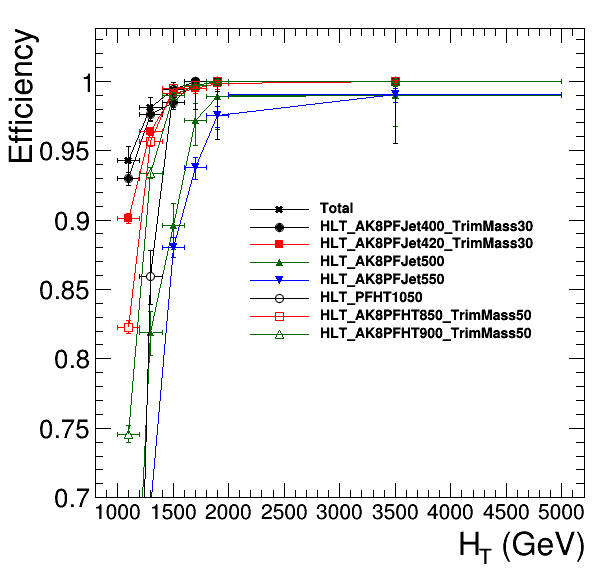

In [7]:
#!/usr/bin/env python

import ROOT
import itertools
import array

from tdrstyle import setTDRStyle
setTDRStyle()

ROOT.gStyle.SetLabelSize(0.04, "X")

s_2018 = 'ttbarreshad_trigfile_JetHT_Run2018.root'
f_2018 = ROOT.TFile(s_2018)

reftrigs = [
    'h_ak4ht_tot',
    'HLT_AK8PFJet380_TrimMass30',
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet450',
    'HLT_AK8PFJet500',
    'HLT_PFHT890',
    'HLT_AK8PFHT800_TrimMass50',
    'HLT_AK8PFHT850_TrimMass50',
]

sigtrigs = [
    'h_ak4ht_eff_tot',
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet420_TrimMass30',
    'HLT_AK8PFJet500',
    'HLT_AK8PFJet550',
    'HLT_PFHT1050',
    'HLT_AK8PFHT850_TrimMass50',
    'HLT_AK8PFHT900_TrimMass50',
]

trigTurnonList = dict( zip(reftrigs,sigtrigs))


istyles = [47,20,21,22,23,24,25,26,32]
icolors = [ROOT.kBlack,ROOT.kBlack, ROOT.kRed, ROOT.kGreen + 3, ROOT.kBlue, ROOT.kBlack, ROOT.kRed, ROOT.kGreen+3, ROOT.kBlue]
styles = dict(zip( reftrigs, istyles))
colors = dict(zip( reftrigs, icolors))

bins = array.array("d", [1000, 1200, 1400, 1600., 1800., 2000., 5000.])

f = f_2018

files = []
effs = []
canvs = []
legs = []

latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextFont(42)
latex.SetTextAlign(31) 
latex.SetTextSize(0.05)   
c1 = ROOT.TCanvas("c1" , "c1", 600, 600)
leg = ROOT.TLegend(0.4, 0.4, 0.95, 0.65)
leg.SetFillColor(0)
leg.SetBorderSize(0)

multigraph = ROOT.TMultiGraph('mg', ';H_{T} (GeV);Efficiency' )

for itrig in reftrigs :
    jtrig = trigTurnonList[itrig]
    if itrig != 'h_ak4ht_tot':        
        num = f.Get("ttbarres/h_ak4ht_" + itrig + '_eff_' + jtrig )
        den = f.Get("ttbarres/h_ak4ht_" + itrig )
    else: 
        num = f.Get("ttbarres/h_ak4ht_eff_tot")
        den = f.Get("ttbarres/h_ak4ht_tot")
    numrebin = num.Rebin(len(bins)-1, "num_" + jtrig, bins)
    denrebin = den.Rebin(len(bins)-1, "den_" + jtrig, bins)
    
    efftot = ROOT.TEfficiency(numrebin,denrebin)
    efftot.SetName('efftot' + jtrig)            

    g = efftot.CreateGraph( 'eff' + jtrig)
    g.SetMarkerStyle(styles[itrig])
    g.SetMarkerColor(colors[itrig])
    g.SetLineColor(colors[itrig])
    if itrig != 'h_ak4ht_tot':
        leg.AddEntry( g,jtrig,'lp')
    else : 
        leg.AddEntry( g,"Total",'lp')
    multigraph.Add( g )
    effs.append(efftot)

multigraph.Draw('ALP')
multigraph.SetMinimum(0.7)
leg.Draw()
c1.Update()
c1.Print('trigs_turnon.png', 'png')
c1.Print('trigs_turnon.pdf', 'pdf')
c1.Draw()





